In [152]:
# Import Packages
import pandas as pd
import numpy as np
from os import listdir

# Import Data Visualisation packages
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
# Display the file names in directory
listdir("Births//")

['regions_lon_lat.csv',
 'regions_pl_uro_2002_00_2p.csv',
 'regions_pl_uro_2003_00_2p.csv',
 'regions_pl_uro_2004_00_2p.csv',
 'regions_pl_uro_2005_00_2p.csv',
 'regions_pl_uro_2006_00_2p.csv',
 'regions_pl_uro_2007_00_2p.csv',
 'regions_pl_uro_2008_00_2p.csv',
 'regions_pl_uro_2009_00_2p.csv',
 'regions_pl_uro_2010_00_2p.csv',
 'regions_pl_uro_2011_00_2p.csv',
 'regions_pl_uro_2012_00_2p.csv',
 'regions_pl_uro_2013_00_2p.csv',
 'regions_pl_uro_2014_00_2p.csv',
 'regions_pl_uro_2015_00_2p.csv',
 'regions_pl_uro_2016_00_2p.csv']

In [178]:
# Import and Format the Data

# Create the list to concatenate and set the first year
dataframes = []
y = 2002

# Use filenames to create multiple Dataframes, drop unnecessary columns and create "year" column
for filepath in listdir("Births//")[1:]:
    df_year = pd.read_csv("Births//" + filepath)
    df_year.drop("Unnamed: 0", axis=1, inplace=True)
    df_year["year"] = y
    y += 1
    dataframes.append(df_year)

# Concatenate dataframes and transform the data    
df_all = pd.concat(dataframes)
df_all.rename(columns={"10 i dalsze": "10+", "nieustalona": "unknown"}, inplace = True)
df_all.sort_values(["region", "year"], inplace=True)

# Replace missing data win NaN and convert columns to float types.
df_all["unknown"].replace("-", np.nan, inplace=True)
df_all["unknown"] = df_all["unknown"].astype(float)
df_all["9"].replace("-", np.nan, inplace=True)
df_all["9"] = df_all["9"].astype(float)

In [155]:
df_all

,region,total,1,2,3,4,5,6,7,8,9,10+,unknown,year
0,DOLNOŚLĄSKIE,24588.0,12684.0,7543.0,2620.0,904.0,418.0,198,113,48,26,34,NaN,2002
0,DOLNOŚLĄSKIE,24103.0,12991.0,7078.0,2408.0,878.0,343.0,184,97,63,26,34,1,2003
0,DOLNOŚLĄSKIE,25046.0,13370.0,7731.0,2426.0,798.0,368.0,181,79,43,22,28,NaN,2004
0,DOLNOŚLĄSKIE,25872.0,14064.0,7989.0,2397.0,789.0,321.0,142,91,32,21,25,1,2005
0,DOLNOŚLĄSKIE,26696.0,14411.0,8639.0,2323.0,746.0,299.0,135,62,42,17,20,2,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,ŚWIĘTOKRZYSKIE,11562.0,5815.0,4121.0,1163.0,259.0,112.0,51,25,5,6,5,NaN,2012
12,ŚWIĘTOKRZYSKIE,10744.0,5372.0,3858.0,1080.0,280.0,81.0,37,22,5,3,6,NaN,2013
12,ŚWIĘTOKRZYSKIE,10789.0,5253.0,4030.0,1090.0,274.0,86.0,28,15,8,1,4,NaN,2014
12,ŚWIĘTOKRZYSKIE,10579.0,5129.0,4054.0,998.0,271.0,72.0,24,9,7,3,4,8,2015


In [179]:
# Datatype and NaN info
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 12
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   240 non-null    object 
 1   total    240 non-null    float64
 2   1        240 non-null    float64
 3   2        240 non-null    float64
 4   3        240 non-null    float64
 5   4        240 non-null    float64
 6   5        240 non-null    float64
 7   6        240 non-null    int64  
 8   7        240 non-null    int64  
 9   8        240 non-null    int64  
 10  9        239 non-null    float64
 11  10+      240 non-null    int64  
 12  unknown  126 non-null    float64
 13  year     240 non-null    int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 28.1+ KB


In [157]:
# Basic informations about the data.
df_all.describe()

,total,1,2,3,4,5,6,7,8,10+,year
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,23857.487500,11797.612500,8237.670833,2479.108333,767.920833,296.258333,132.158333,64.425000,33.591667,19.833333,2009.000000
std,12776.753206,6466.654136,4594.678737,1271.473088,374.973246,152.451844,73.488051,38.426404,21.130990,14.297106,4.329523
min,8186.000000,3840.000000,2580.000000,811.000000,206.000000,71.000000,19.000000,8.000000,4.000000,1.000000,2002.000000
25%,13043.750000,6461.250000,4449.500000,1460.750000,473.250000,180.750000,77.500000,35.750000,18.000000,9.000000,2005.000000
50%,21380.000000,10382.500000,7299.000000,2294.500000,706.500000,271.000000,117.000000,56.500000,28.500000,16.000000,2009.000000
75%,30500.750000,15171.500000,10280.250000,3265.500000,1019.000000,381.250000,171.500000,83.000000,46.250000,27.000000,2013.000000
max,61024.000000,30827.000000,23041.000000,6419.000000,1979.000000,848.000000,374.000000,195.000000,121.000000,72.000000,2016.000000


In [158]:
# Get the region and min and max value of number of births for each year
max_val1 = df_all[df_all["total"].isin(df_all.groupby("year")["total"].max())]
min_val1 = df_all[df_all["total"].isin(df_all.groupby("year")["total"].min())]
max_val1 = max_val1.loc[:, ["year", "region", "total"]]
min_val1 = min_val1.loc[:, ["year", "region", "total"]]

# Merge min and max values on year. Transform the Dataframe index and columns names.
extreme_val1 = max_val1.merge(min_val1, on="year")
extreme_val1.set_index("year", inplace=True)
extreme_val1.rename(columns={"region_x": "Max region", "total_x": "Max Births",
                        "region_y": "Min region", "total_y": "Min Births"}, inplace=True)
extreme_val1

,Max region,Max Births,Min region,Min Births
year,,,,
2002,MAZOWIECKIE,46627.0,OPOLSKIE,8506.0
2003,MAZOWIECKIE,46791.0,OPOLSKIE,8186.0
2004,MAZOWIECKIE,48581.0,OPOLSKIE,8253.0
2005,MAZOWIECKIE,50195.0,OPOLSKIE,8528.0
2006,MAZOWIECKIE,53003.0,OPOLSKIE,8502.0
2007,MAZOWIECKIE,55389.0,OPOLSKIE,8537.0
2008,MAZOWIECKIE,58963.0,OPOLSKIE,9215.0
2009,MAZOWIECKIE,60106.0,OPOLSKIE,9322.0
2010,MAZOWIECKIE,61024.0,OPOLSKIE,9195.0


Throughout the years region Mazowieckie scored the highest number of births and the region Opolskie scored the lowest.

In [159]:
# Get the year and max and min value of births for each region.
max_val2 = df_all[df_all["total"].isin(df_all.groupby("region")["total"].max())]
min_val2 = df_all[df_all["total"].isin(df_all.groupby("region")["total"].min())]
max_val2 = max_val2.loc[:, ["region", "year", "total"]]
min_val2 = min_val2.loc[:, ["region", "year", "total"]]

# Merge max and min values on region. Transform the Dataframe index and column names.
extreme_val2 = max_val2.merge(min_val2, on="region")
extreme_val2.set_index("region", inplace=True)
extreme_val2.rename(columns={"year_x": "Max year", "total_x": "Max Births",
                            "year_y": "Min year", "total_y": "Min Births"}, inplace=True)
extreme_val2

,Max year,Max Births,Min year,Min Births
region,,,,
DOLNOŚLĄSKIE,2008,29995.0,2003,24103.0
KUJAWSKO-POMORSKIE,2008,23349.0,2015,19190.0
LUBELSKIE,2008,23109.0,2016,19666.0
LUBUSKIE,2009,11542.0,2003,9327.0
MAZOWIECKIE,2010,61024.0,2002,46627.0
MAŁOPOLSKIE,2009,37424.0,2003,32018.0
OPOLSKIE,2009,9322.0,2003,8186.0
PODKARPACKIE,2009,22440.0,2015,19566.0
PODLASKIE,2009,12257.0,2013,10650.0


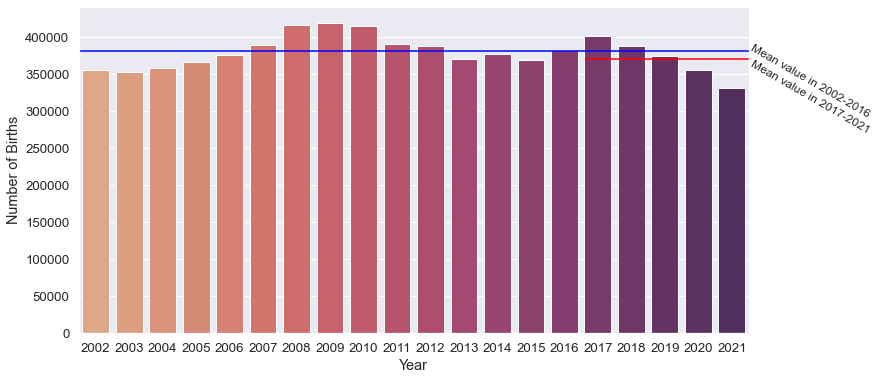

In [160]:
# I've added additional Data for recent years from (http://swaid.stat.gov.pl/SitePagesDBW/Demografia.aspx)
later_births = pd.Series([401982, 388178, 374954, 355309, 331511], 
                         index=[2017, 2018, 2019, 2020, 2021])

# Create Series with number of births in 2002-2021
graph_data1 = pd.concat([df_all.groupby("year").sum()["total"], later_births])

# Set the font scale and prepare the figure
sns.set(font_scale=1.2)
fig, ax1 = plt.subplots(figsize=(12,6))

# Create a barplot of total births per year
sns.barplot(x=graph_data1.index, y=graph_data1, palette="flare", ax=ax1)

# Calculate mean for 2002-2016 and 2017-2021
first_period = df_all.groupby("year").sum()["total"].mean()
second_period = later_births.mean()

# Create Lines indicating mean values of numer of births before and after 500+
plt.axhline(y=first_period, color="blue")
plt.axhline(y=second_period, color="red", xmin = 0.757)

# Add the labels
ax1.text(19.5, first_period - 90000, "Mean value in 2002-2016", rotation=-30, fontsize = 12)
ax1.text(19.5, second_period - 100000, "Mean value in 2017-2021", rotation=-30, fontsize = 12)
plt.xlabel("Year")
plt.ylabel("Number of Births")


plt.show()

In [161]:
print("Mean of births before 500+:", first_period)
print("Mean of births after 500+:", second_period)

Mean of births before 500+: 381719.8
Mean of births after 500+: 370386.8


Even though 500+ came to life in the second half of 2016, in recent years the number of births is reaching record low numbers.

And the mean of number of births per year decreased during the period of 500+.

In [184]:
df_proportion = df_all.loc[:, ["region", "year"]]

for column in df_all.columns[2:-1]:
    df_proportion[column] = df_all[column]/df_all["total"]

df_proportion

,region,year,1,2,3,4,5,6,7,8,9,10+,unknown
0,DOLNOŚLĄSKIE,2002,0.515861,0.306776,0.106556,0.036766,0.017000,0.008053,0.004596,0.001952,0.001057,0.001383,NaN
0,DOLNOŚLĄSKIE,2003,0.538979,0.293656,0.099905,0.036427,0.014231,0.007634,0.004024,0.002614,0.001079,0.001411,0.000041
0,DOLNOŚLĄSKIE,2004,0.533818,0.308672,0.096862,0.031861,0.014693,0.007227,0.003154,0.001717,0.000878,0.001118,NaN
0,DOLNOŚLĄSKIE,2005,0.543599,0.308789,0.092648,0.030496,0.012407,0.005489,0.003517,0.001237,0.000812,0.000966,0.000039
0,DOLNOŚLĄSKIE,2006,0.539819,0.323607,0.087017,0.027944,0.011200,0.005057,0.002322,0.001573,0.000637,0.000749,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,ŚWIĘTOKRZYSKIE,2012,0.502941,0.356426,0.100588,0.022401,0.009687,0.004411,0.002162,0.000432,0.000519,0.000432,NaN
12,ŚWIĘTOKRZYSKIE,2013,0.500000,0.359084,0.100521,0.026061,0.007539,0.003444,0.002048,0.000465,0.000279,0.000558,NaN
12,ŚWIĘTOKRZYSKIE,2014,0.486885,0.373529,0.101029,0.025396,0.007971,0.002595,0.001390,0.000741,0.000093,0.000371,NaN
12,ŚWIĘTOKRZYSKIE,2015,0.484828,0.383212,0.094338,0.025617,0.006806,0.002269,0.000851,0.000662,0.000284,0.000378,0.000756


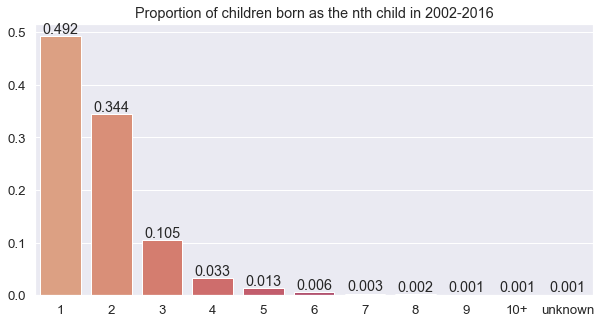

In [202]:
# Prepare the data for graph
graph_data2 = df_proportion.groupby("region").mean().mean()[1:].round(3)

# Create the bar plot
ax = sns.barplot(x=graph_data2.index, y=graph_data2, palette="flare")
ax.bar_label(ax.containers[0])
ax.set(title="Proportion of children born as the nth child in 2002-2016")

plt.show()

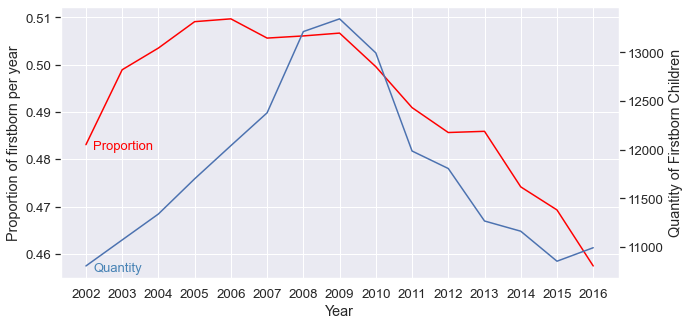

In [263]:
# Prepare the data for plotting
graph_data3 = df_proportion.groupby("year").mean()["1"]
graph_data4 = df_all.groupby("year").mean()["1"]

# Create the graph of proportion of firstborn
ax = sns.lineplot(x=graph_data3.index, y=graph_data3, color="red")
plt.xticks(graph_data3.index)
plt.xlabel("Year")
plt.ylabel("Proportion of firstborn per year")
ax.text(x=2002.2, y=0.482, s="Proportion", fontsize=13, color="red")

# Create the graph of quantity of firstborn
ax2 = ax.twinx()
sns.lineplot(x=graph_data4.index, y=graph_data4, ax=ax2)
ax2.text(x=2002.2, y=10750, s="Quantity", fontsize=13, color="steelblue")
ax2.grid(False)
plt.ylabel("Quantity of Firstborn Children")


plt.show()

Both Proportion and number of firstborn decreases. It indicates that people less frequently decide to start parental role.

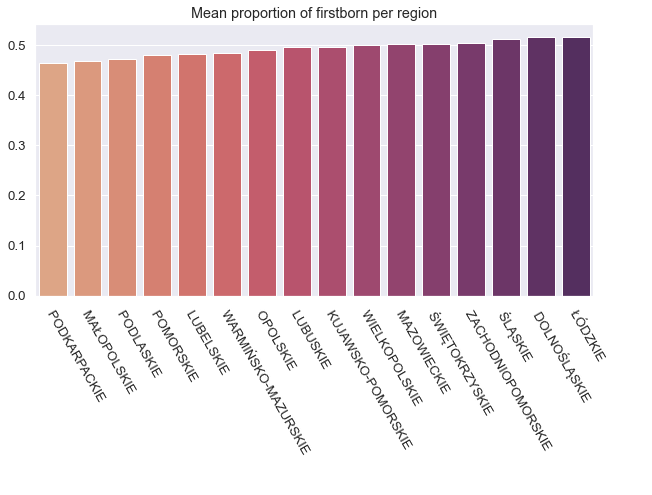

In [322]:
# Prepare the Data
graph_data5 = df_proportion.groupby("region").mean()["1"].sort_values()

# Create the graph
ax = sns.barplot(x=graph_data5.index, y=graph_data5, palette="flare")
plt.xticks(rotation=300, rotation_mode="anchor", ha="left")
plt.xlabel("")
plt.ylabel("")
ax.set(title="Mean proportion of firstborn per region")

plt.show()

The values are somehow connected to wealth of a region. More wealthy are more likely to have higher proportion of firstborn. However this rule is not perfect and there are outcasts (Pomorskie, Łódzkie, Świętokrzyskie, Kujawsko-Pomorskie)

The least wealthy region in poland has the lowest proportion of firstborns.

#### I Might or Might not continue my analysis, I should use more recent data from GOV, however their webpage is horrible and I want to learn web-scraping before attempting this...